# Mass Spring Damper Systems

An square matrix, $P \in \mathbb{R}^{n\times n}$,  such that $\vec{x}^T P \vec{x} > 0$ for all $\vec{x} \in \mathbb{R}^n$ is called **positive definite**.

A matrix is **positive definite** if and only if:

1. The matrix is **Hermitian** (self-adjoint).
    * **Hermitian** $P=\bar{P}^T$, where $\bar{P}^T$ is often denoted as $P^*$
    * This can be thought of the extension of *symmetric* to complex matrices. A Hermitian matrix is garunteed to have *real* eigenvalues.
2. The matrix is **diagonally dominant** with a **positive diagonal**.
    * A diagonally dominant matrix will have eigen values with positive real part if the diagonal is positive.
    * If the diagonal is negative, it will have eigenvalues with negative real part.
3. The matrix is invertible.

**Question 1**

Is the matrix $\begin{bmatrix}
-1 & 0 \\
0 & 2
\end{bmatrix}$ positive definite?

**Question 2**

Is the matrix $\begin{bmatrix}
2 & 1 \\
1 & 3
\end{bmatrix}$ positive definite?

**Question 3**

Show that the matrix: $\begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix}$ is not positive definite.

In [3]:
import numpy as np
A = np.array([
    [1, 3],
    [0, 2]
], dtype=float)
np.linalg.eig(A)

x = np.array([[2], [-1]], dtype=float)
x.T.dot(A).dot(x)

array([[0.]])

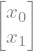

In [4]:
import sympy
sympy.init_printing()
x = sympy.Matrix(sympy.symbols('x_0:2'))
x

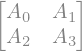

In [5]:
A = sympy.Matrix(sympy.symbols('A_0:4')).reshape(2, 2)
A

In [6]:
(x.T*A*x)[0].expand().collect(x[0]*x[1])

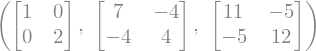

In [7]:
m1 = 1
m2 = 2
c1 = 3
c2 = 4
k1 = 6
k2 = 5
k3 = 7

M = sympy.Matrix([
    [m1, 0],
    [0, m2]
])
MI = M.inv()

Phi = sympy.Matrix([
    [c1+c2, -c2],
    [-c2, c2]
])

K = sympy.Matrix([
    [k1 + k2, -k2],
    [-k2, k2 + k3]
])
M, Phi, K

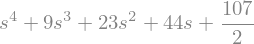

In [8]:
Z = sympy.zeros(2, 2)
I = sympy.eye(2)
M = sympy.Matrix(M).inv()
A = sympy.Matrix.vstack(
    sympy.Matrix.hstack(Z, I),
    sympy.Matrix.hstack(-MI*K, -MI*Phi)
)
B = sympy.Matrix.vstack(Z, MI)
C = sympy.Matrix.hstack(I, Z)
D = Z
s = sympy.symbols('s')
(s*sympy.eye(4) - A).det()

In [9]:
import control
sys = control.ss(A, B, C, D)
sys

StateSpace(array([[  0. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   0. ,   1. ],
       [-11. ,   5. ,  -7. ,   4. ],
       [  2.5,  -6. ,   2. ,  -2. ]]), array([[0. , 0. ],
       [0. , 0. ],
       [1. , 0. ],
       [0. , 0.5]]), array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]]), array([[0., 0.],
       [0., 0.]]))

In [10]:
G = control.ss2tf(sys)
G

TransferFunction([[array([1., 2., 6.]), array([2. , 2.5])], [array([2. , 2.5]), array([0.5, 3.5, 5.5])]], [[array([ 1. ,  9. , 23. , 44. , 53.5]), array([ 1. ,  9. , 23. , 44. , 53.5])], [array([ 1. ,  9. , 23. , 44. , 53.5]), array([ 1. ,  9. , 23. , 44. , 53.5])]])

U = 1/s

Y = GU

$y(\infty) = \lim_{s \rightarrow 0} s Y(s)$ 

In [11]:
G

TransferFunction([[array([1., 2., 6.]), array([2. , 2.5])], [array([2. , 2.5]), array([0.5, 3.5, 5.5])]], [[array([ 1. ,  9. , 23. , 44. , 53.5]), array([ 1. ,  9. , 23. , 44. , 53.5])], [array([ 1. ,  9. , 23. , 44. , 53.5]), array([ 1. ,  9. , 23. , 44. , 53.5])]])

In [12]:
G[0, 1]

TransferFunction(array([2. , 2.5]), array([ 1. ,  9. , 23. , 44. , 53.5]))

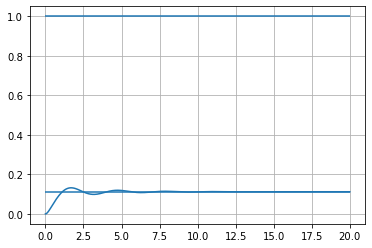

In [13]:
import matplotlib.pyplot as plt
t, y = control.step_response(G[0, 0], T=np.linspace(0, 20, 1000))
plt.plot(t, y)
plt.hlines(1, 0, 20)
plt.hlines(6/53.5, t[0], t[-1])
plt.grid()

In [14]:
A = np.array([[1, -1], [-1, 1]])
np.linalg.eig(A)

(array([2., 0.]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))